Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../../data/thread_ring/1/'

N = 10_000_000
R = 1_000_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}7/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}7/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}7/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}7/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '../../../data/thread_ring/1/7/thread_ring_benchmark_idle_power.csv'

Preview the Data

In [ ]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 18:00:46 2025 +0100) (510.06ms ela...,0.381,0.0288,0.597,2.33,0.16,10.93,56.32 C,Nominal
1,(Fri Mar 28 18:00:46 2025 +0100) (507.82ms ela...,3.320,0.0633,0.856,4.41,0.58,29.55,55.88 C,Nominal
2,(Fri Mar 28 18:00:47 2025 +0100) (508.27ms ela...,0.262,0.0354,0.653,1.26,0.16,11.19,55.88 C,Nominal
3,(Fri Mar 28 18:00:47 2025 +0100) (508.81ms ela...,0.233,0.0325,0.405,1.00,0.17,11.44,55.46 C,Nominal
4,(Fri Mar 28 18:00:48 2025 +0100) (510.47ms ela...,0.241,0.0215,0.395,0.99,0.17,11.78,55.46 C,Nominal


In [ ]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(8279, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 18:00:58 2025 +0100) (1007.78ms el...,37.0,0.0458,1.92,38.83,3.94,98.86,57.85 C,Nominal
1,(Fri Mar 28 18:00:59 2025 +0100) (1005.25ms el...,36.3,0.0313,1.56,37.69,3.76,97.21,61.78 C,Nominal
2,(Fri Mar 28 18:01:00 2025 +0100) (1005.52ms el...,36.1,0.0426,1.79,39.16,3.89,97.97,64.34 C,Nominal
3,(Fri Mar 28 18:01:01 2025 +0100) (1006.77ms el...,35.4,0.0407,1.09,38.59,3.85,98.02,66.38 C,Nominal
4,(Fri Mar 28 18:01:02 2025 +0100) (1004.86ms el...,35.7,0.0448,1.39,39.25,3.90,98.36,68.70 C,Nominal


In [ ]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 20:29:17 2025 +0100) (510.42ms ela...,0.1730,0.0000,0.382,0.49,0.03,2.21,45.84 C,Nominal
1,(Fri Mar 28 20:29:18 2025 +0100) (508.20ms ela...,0.0946,0.0435,0.276,0.24,0.06,4.07,48.42 C,Nominal
2,(Fri Mar 28 20:29:18 2025 +0100) (509.40ms ela...,1.1200,0.0000,0.319,1.23,0.20,17.52,48.42 C,Nominal
3,(Fri Mar 28 20:29:19 2025 +0100) (509.04ms ela...,0.0618,0.0000,0.263,0.12,0.04,3.12,48.74 C,Nominal
4,(Fri Mar 28 20:29:19 2025 +0100) (508.08ms ela...,0.0454,0.0000,0.230,0.08,0.02,1.86,48.74 C,Nominal


In [ ]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(40586, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 20:29:29 2025 +0100) (1011.47ms el...,14.7,0.0000,0.942,15.57,1.64,96.89,48.00 C,Nominal
1,(Fri Mar 28 20:29:30 2025 +0100) (1005.85ms el...,16.0,0.0000,0.693,16.69,1.92,95.72,49.21 C,Nominal
2,(Fri Mar 28 20:29:31 2025 +0100) (1006.92ms el...,15.8,0.0000,0.726,16.46,1.88,95.72,50.22 C,Nominal
3,(Fri Mar 28 20:29:32 2025 +0100) (1006.91ms el...,15.7,0.0000,0.712,16.40,1.88,95.80,51.01 C,Nominal
4,(Fri Mar 28 20:29:33 2025 +0100) (1006.62ms el...,16.4,0.0037,0.813,17.11,1.94,95.72,51.62 C,Nominal


Clean the Data

In [ ]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [ ]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [ ]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 18:00:46,0.381,0.0288,0.597,2.33,0.16,10.93,56.32,Nominal,510.06
1,2025-03-28 18:00:46,3.320,0.0633,0.856,4.41,0.58,29.55,55.88,Nominal,507.82
2,2025-03-28 18:00:47,0.262,0.0354,0.653,1.26,0.16,11.19,55.88,Nominal,508.27
3,2025-03-28 18:00:47,0.233,0.0325,0.405,1.00,0.17,11.44,55.46,Nominal,508.81
4,2025-03-28 18:00:48,0.241,0.0215,0.395,0.99,0.17,11.78,55.46,Nominal,510.47


In [ ]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(8279, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 18:00:58,37.0,0.0458,1.92,38.83,3.94,98.86,57.85,Nominal,1007.78
1,2025-03-28 18:00:59,36.3,0.0313,1.56,37.69,3.76,97.21,61.78,Nominal,1005.25
2,2025-03-28 18:01:00,36.1,0.0426,1.79,39.16,3.89,97.97,64.34,Nominal,1005.52
3,2025-03-28 18:01:01,35.4,0.0407,1.09,38.59,3.85,98.02,66.38,Nominal,1006.77
4,2025-03-28 18:01:02,35.7,0.0448,1.39,39.25,3.90,98.36,68.70,Nominal,1004.86


In [ ]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 20:29:17,0.1730,0.0000,0.382,0.49,0.03,2.21,45.84,Nominal,510.42
1,2025-03-28 20:29:18,0.0946,0.0435,0.276,0.24,0.06,4.07,48.42,Nominal,508.20
2,2025-03-28 20:29:18,1.1200,0.0000,0.319,1.23,0.20,17.52,48.42,Nominal,509.40
3,2025-03-28 20:29:19,0.0618,0.0000,0.263,0.12,0.04,3.12,48.74,Nominal,509.04
4,2025-03-28 20:29:19,0.0454,0.0000,0.230,0.08,0.02,1.86,48.74,Nominal,508.08


In [ ]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(40586, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 20:29:29,14.7,0.0000,0.942,15.57,1.64,96.89,48.00,Nominal,1011.47
1,2025-03-28 20:29:30,16.0,0.0000,0.693,16.69,1.92,95.72,49.21,Nominal,1005.85
2,2025-03-28 20:29:31,15.8,0.0000,0.726,16.46,1.88,95.72,50.22,Nominal,1006.92
3,2025-03-28 20:29:32,15.7,0.0000,0.712,16.40,1.88,95.80,51.01,Nominal,1006.91
4,2025-03-28 20:29:33,16.4,0.0037,0.813,17.11,1.94,95.72,51.62,Nominal,1006.62


Visualize the Data

In [ ]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


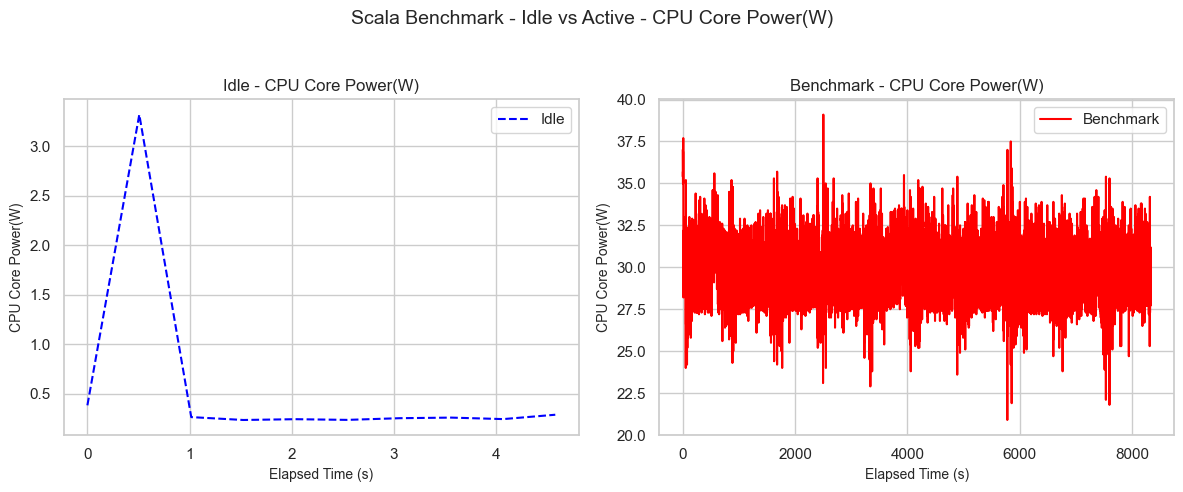

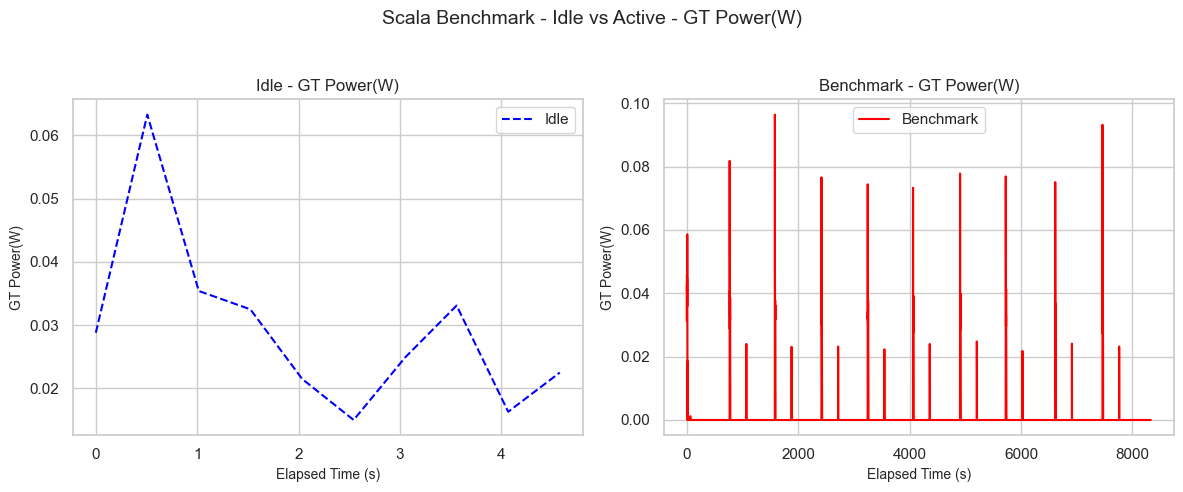

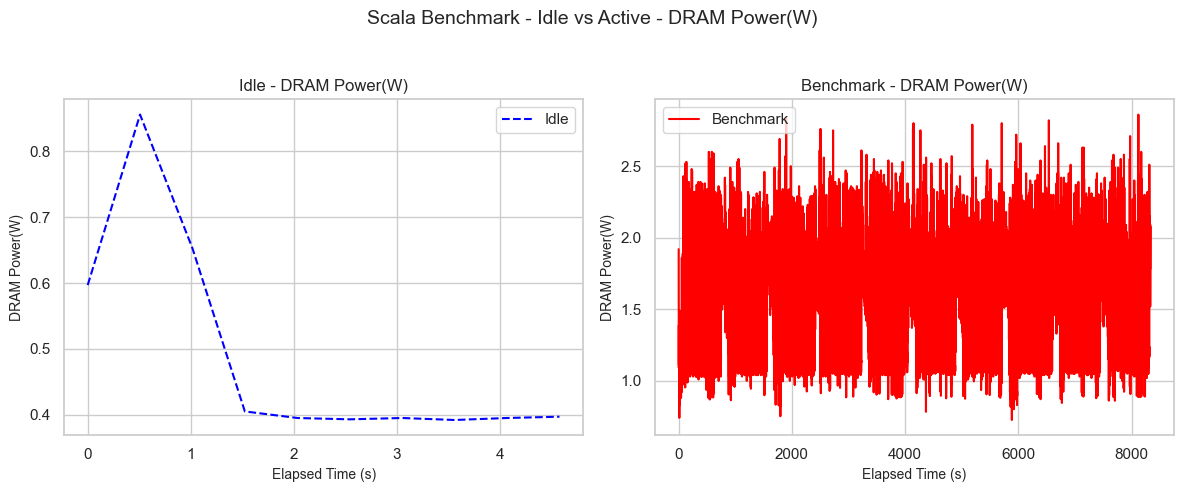

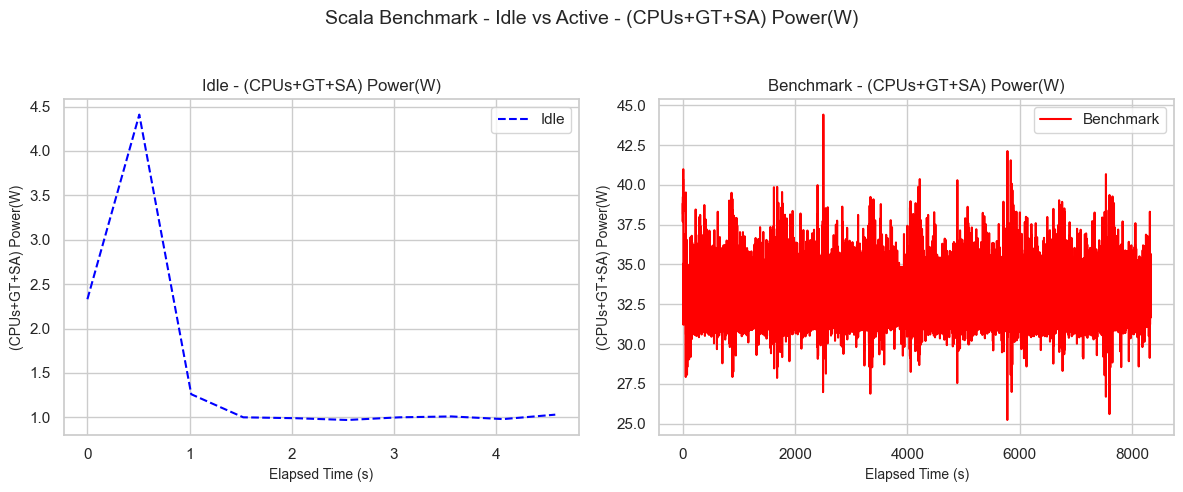

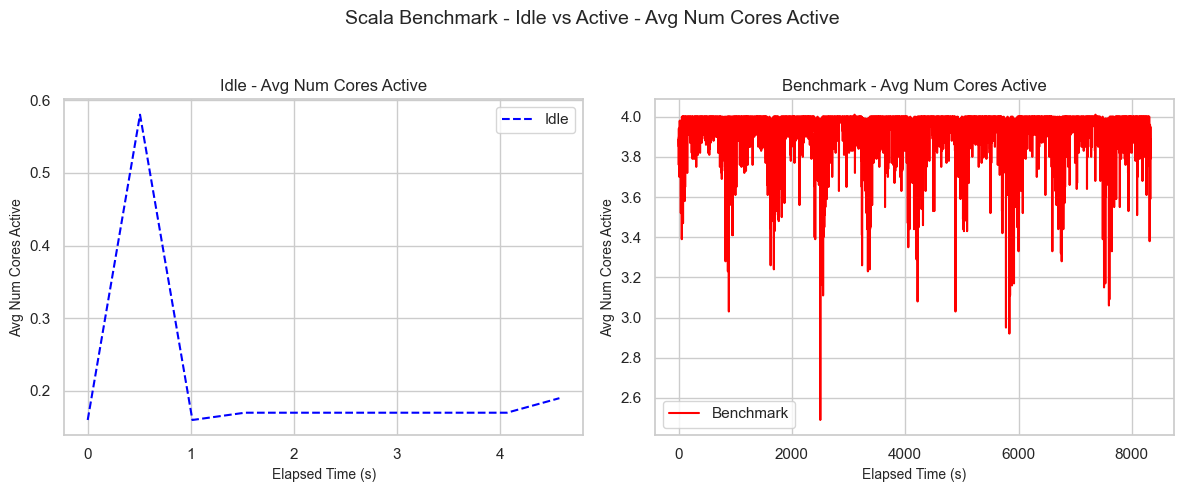

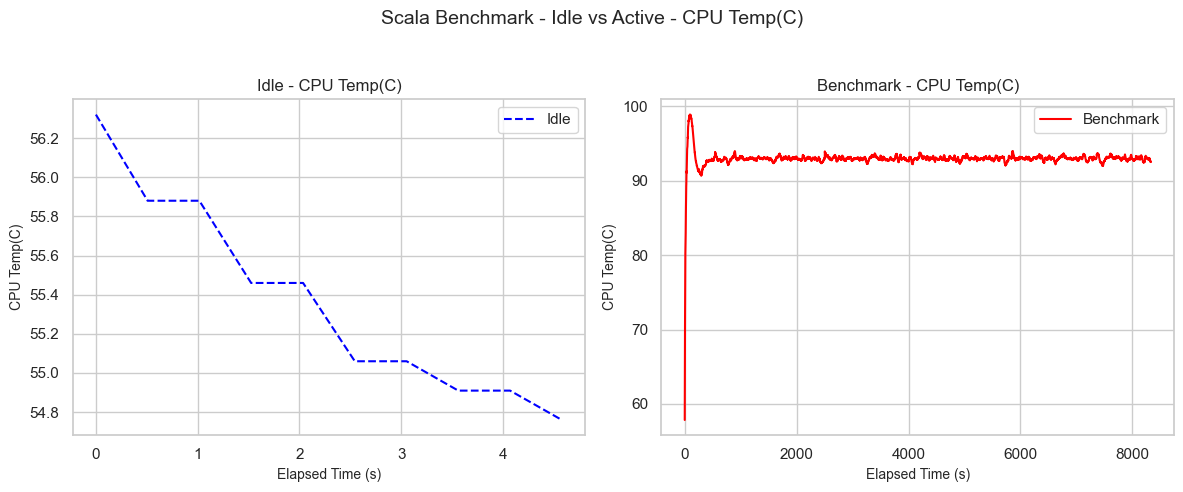

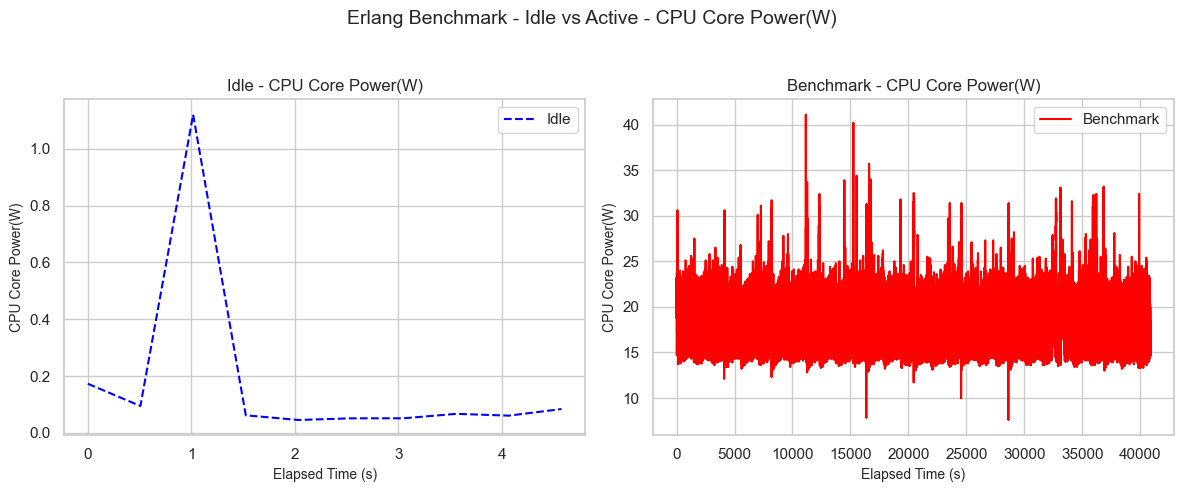

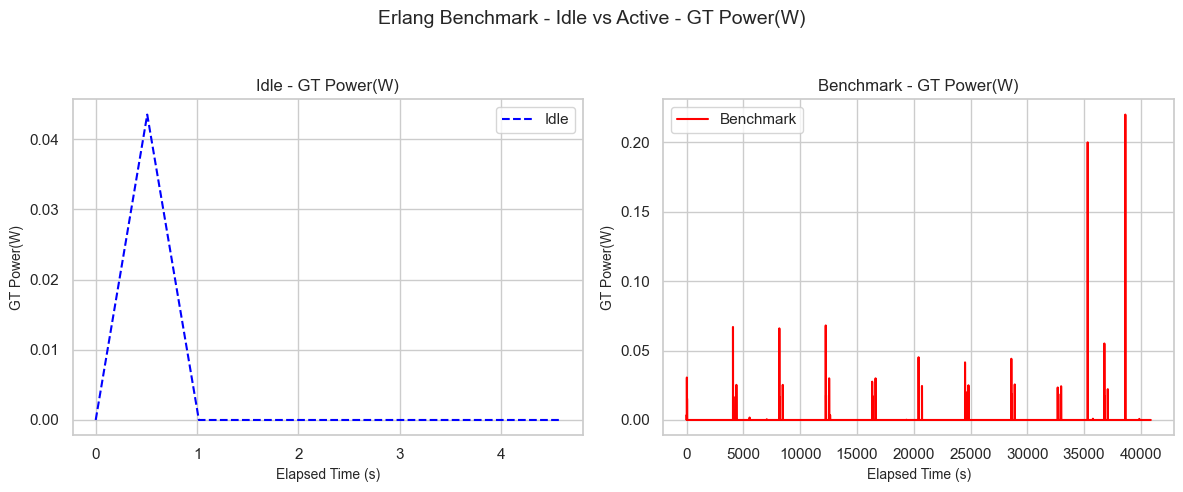

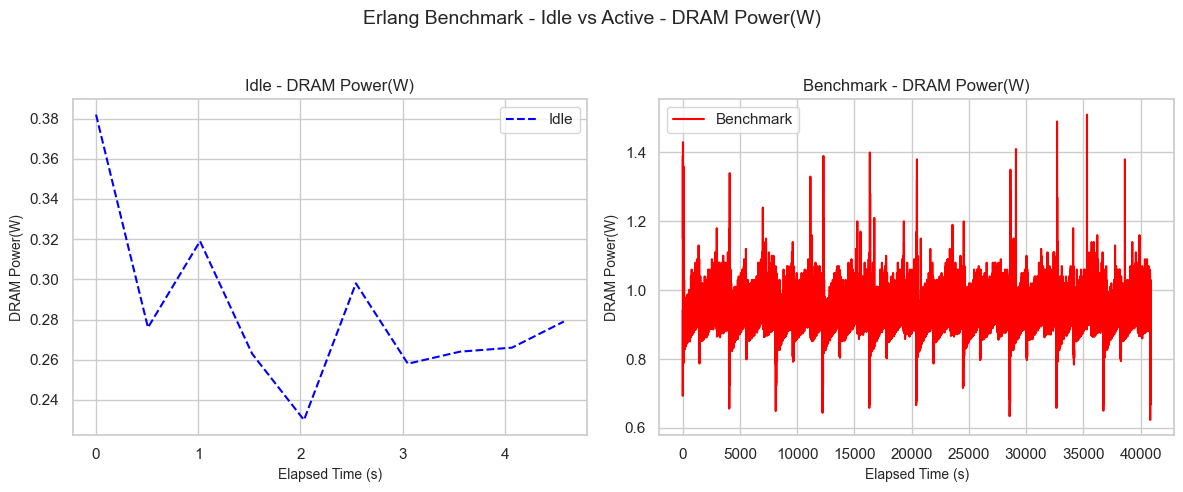

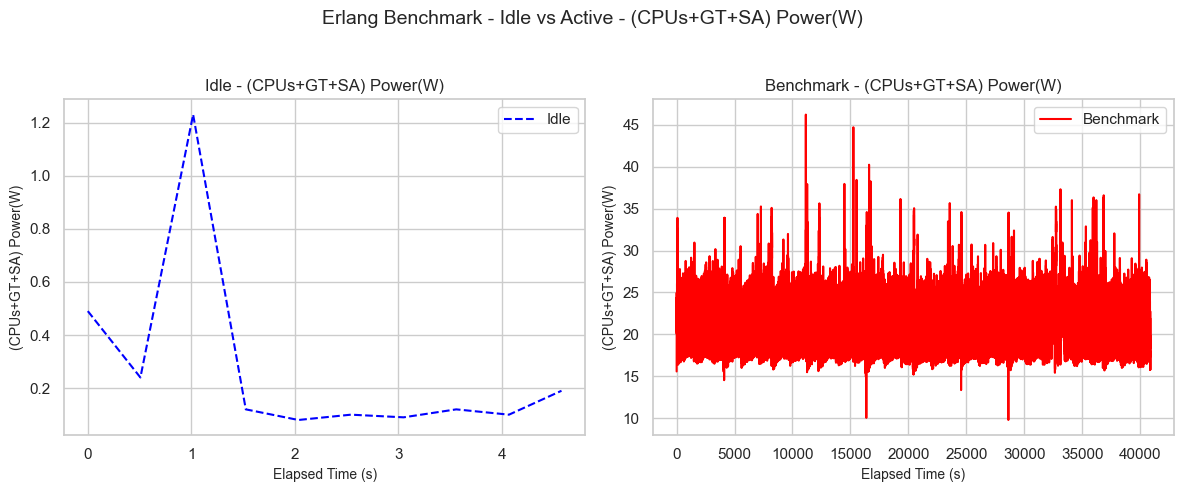

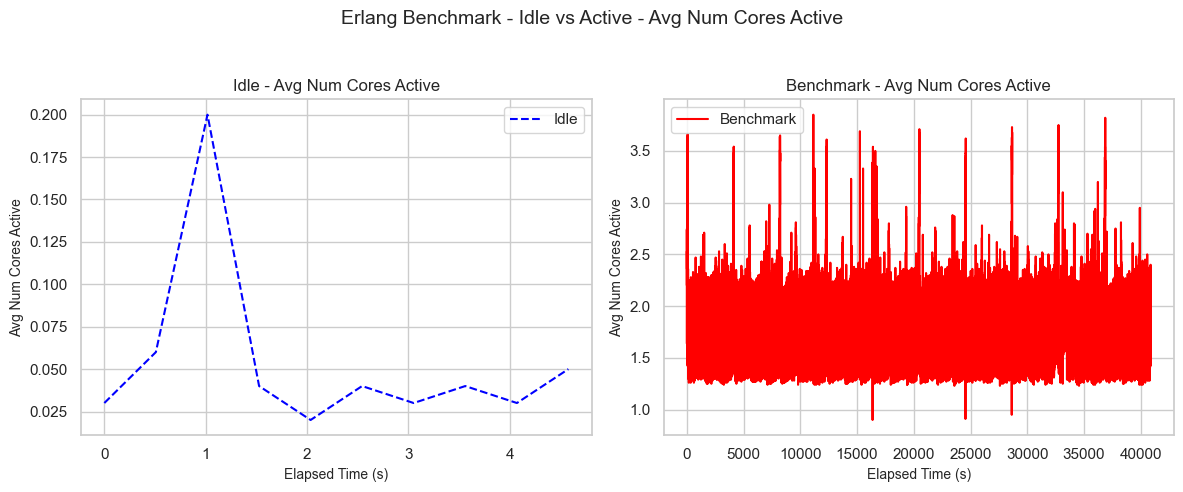

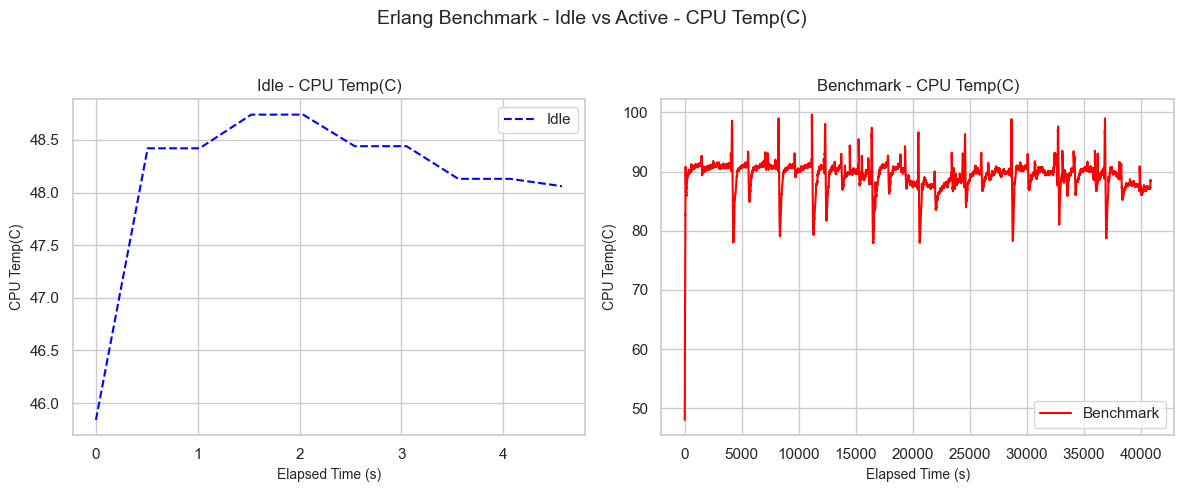

In [ ]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [ ]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [ ]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

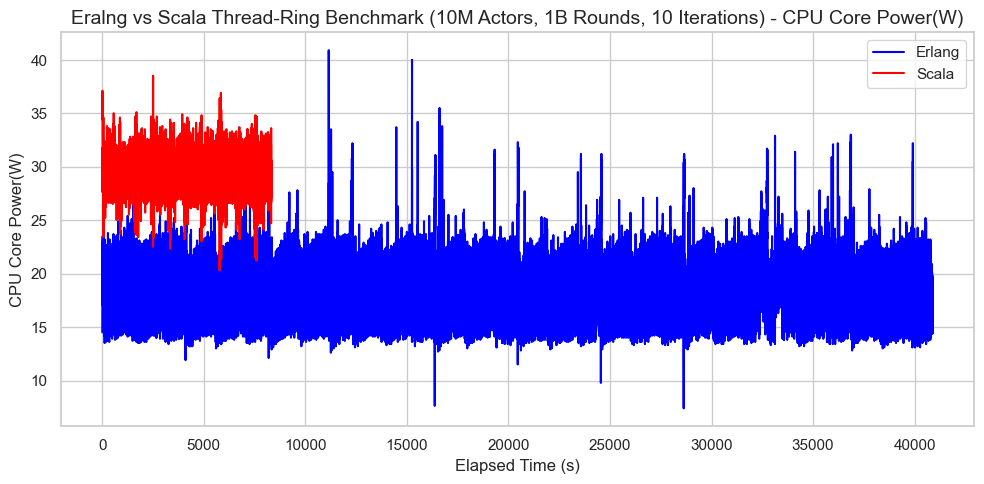

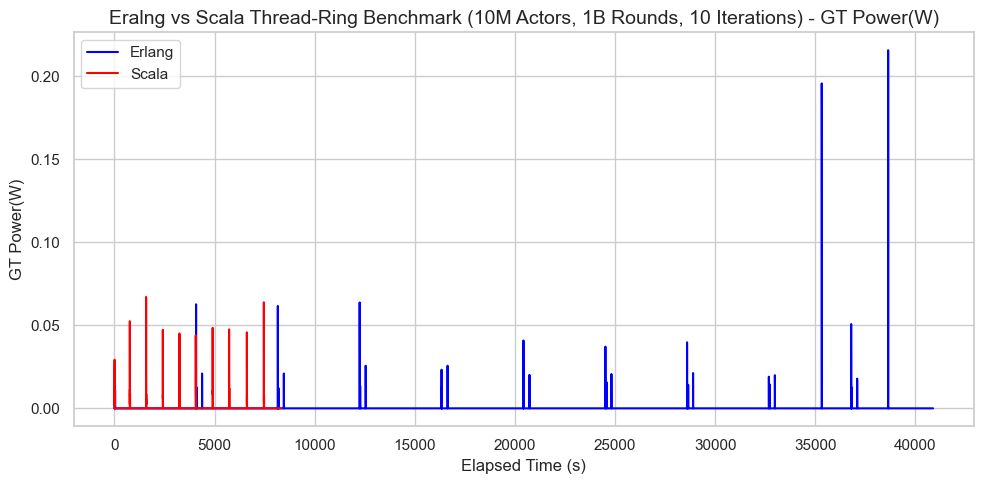

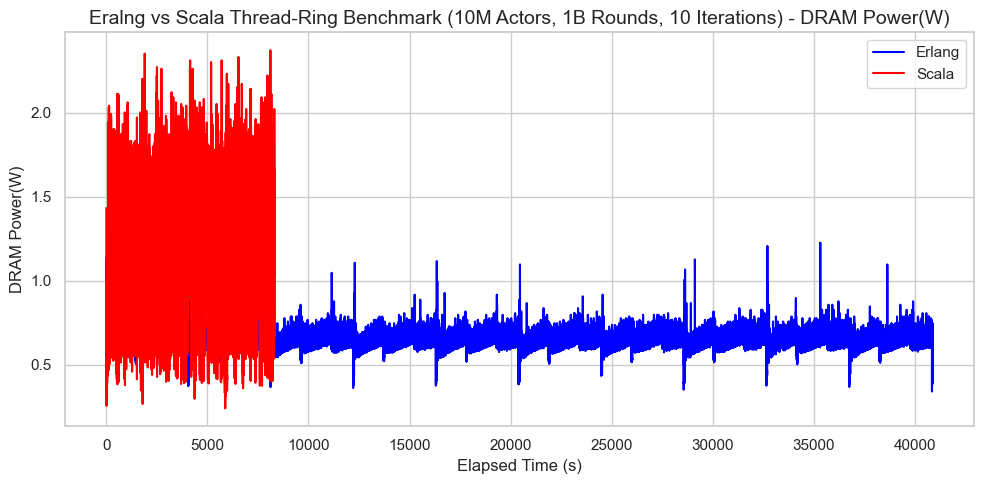

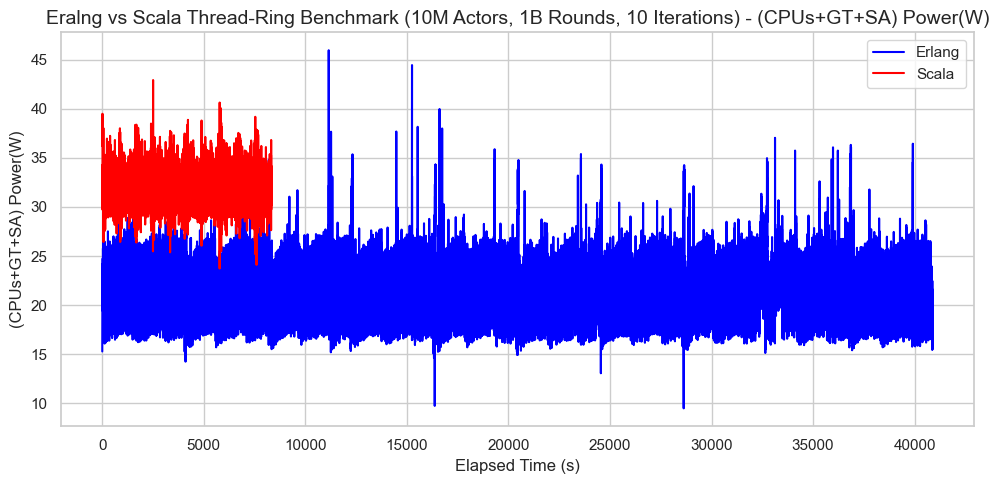

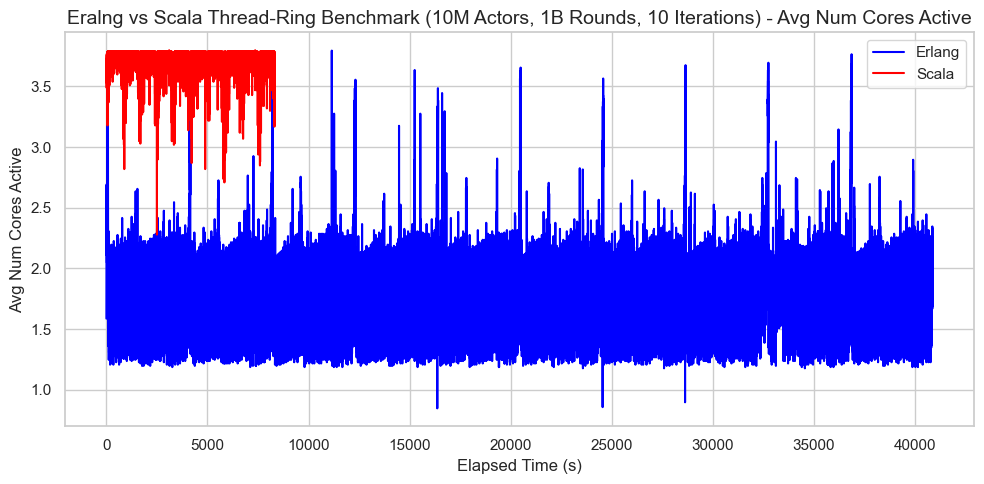

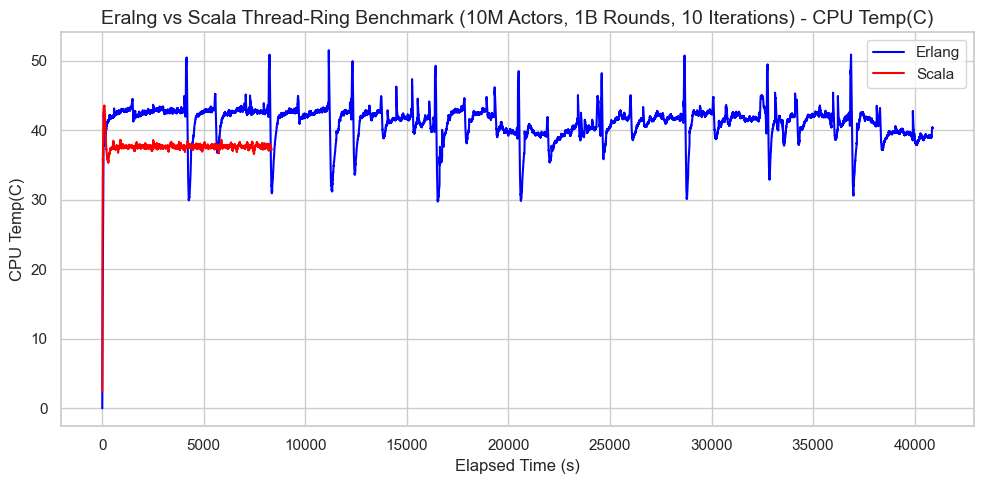

In [ ]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [ ]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [ ]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        29.252286
GT Power(W)              -0.028786
DRAM Power(W)             0.905715
(CPUs+GT+SA) Power(W)    31.786815
CPU Temp(C)              37.615474
Avg Num Cores Active      3.744693
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        16.269274
GT Power(W)              -0.004304
DRAM Power(W)             0.619175
(CPUs+GT+SA) Power(W)    19.115645
CPU Temp(C)              41.164169
Avg Num Cores Active      1.502495
dtype: float64


Compute Total Energy Consumption

In [ ]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time
scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/thread_ring/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 264794.97210750444 Joules
Erlang Benchmark: 781461.2879283316 Joules
